In [2]:
# Import all pacakges needed for notebook
from kaggle.api.kaggle_api_extended import KaggleApi
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#load data to a dataframe using an API call
api = KaggleApi()
api.authenticate()
api.dataset_download_file('thedevastator/cancer-patients-and-air-pollution-a-new-link','cancer patient data sets.csv', path='./')
df = pd.read_csv('cancer%20patient%20data%20sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


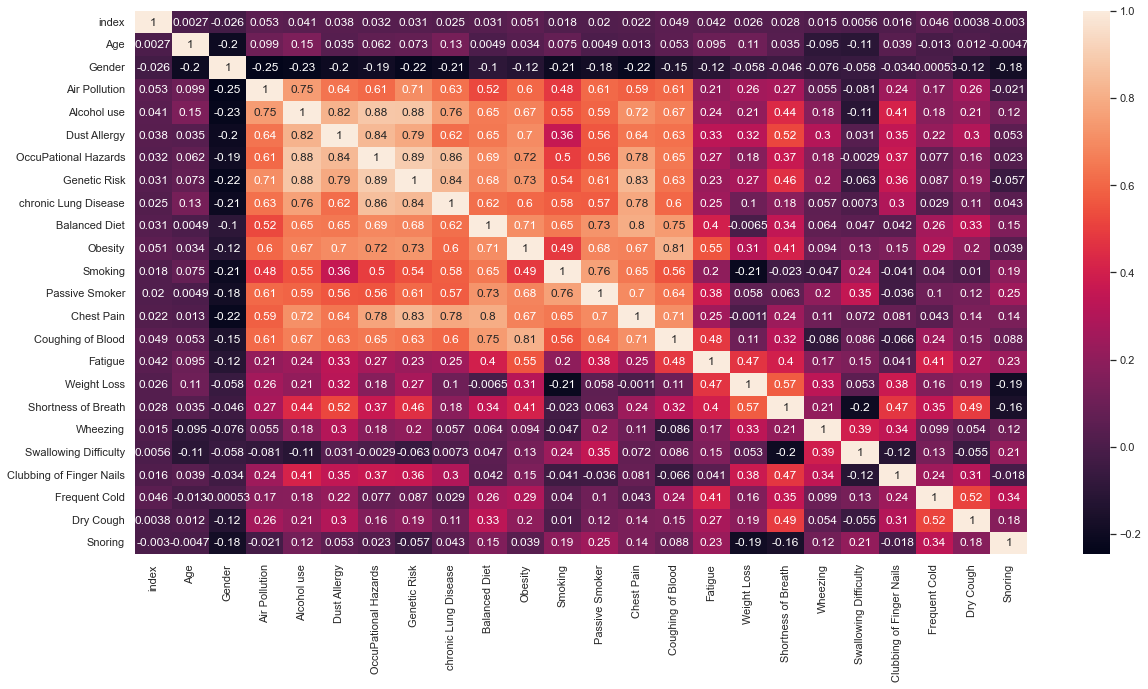

In [20]:
corr = df.corr()
sns.set(rc={'figure.figsize':(25,15)})
sns.heatmap(corr, annot=True)
plt.show() #need to make the size bigger, too cramped

In [12]:
df_bryson = df[['Age','Gender','Air Pollution','Alcohol use','Level']]
display(df_bryson.head())
display(df_bryson.describe())
display(df_bryson.isnull().sum())


,Age,Gender,Air Pollution,Alcohol use,Level
0,33,1,2,4,Low
1,17,1,3,1,Medium
2,35,1,4,5,High
3,37,1,7,7,High
4,46,1,6,8,High


,Age,Gender,Air Pollution,Alcohol use
count,1000.000000,1000.000000,1000.0000,1000.000000
mean,37.174000,1.402000,3.8400,4.563000
std,12.005493,0.490547,2.0304,2.620477
min,14.000000,1.000000,1.0000,1.000000
25%,27.750000,1.000000,2.0000,2.000000
50%,36.000000,1.000000,3.0000,5.000000
75%,45.000000,2.000000,6.0000,7.000000
max,73.000000,2.000000,8.0000,8.000000


Age              0
Gender           0
Air Pollution    0
Alcohol use      0
Level            0
dtype: int64

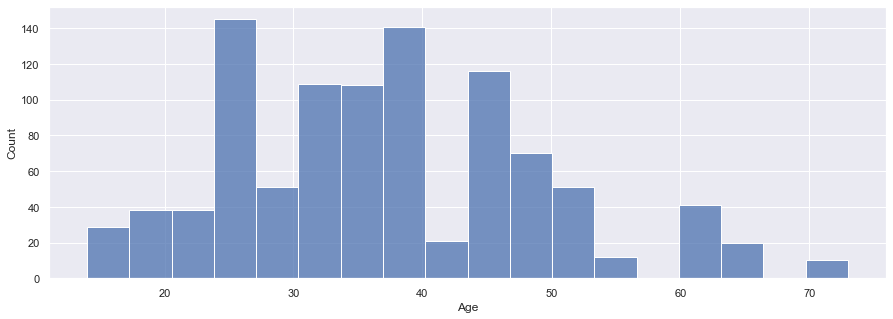

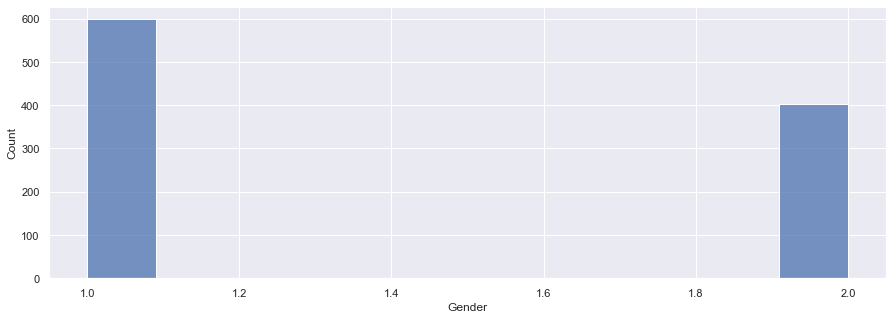

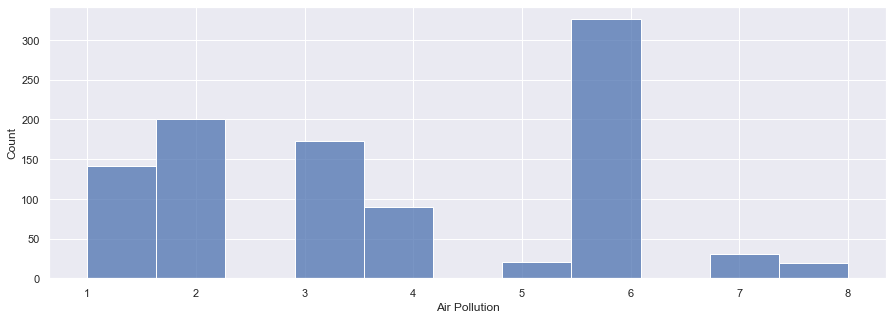

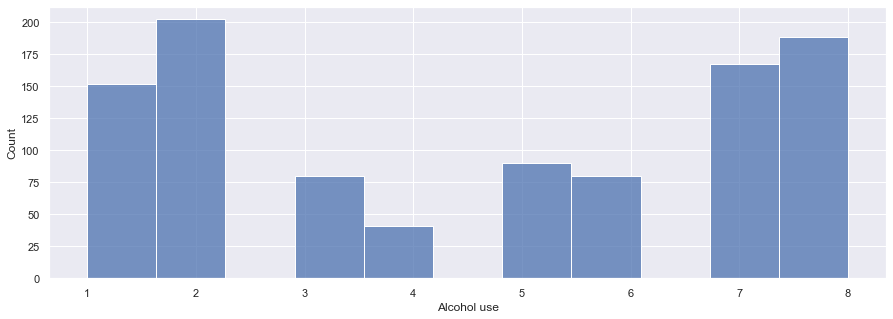

In [25]:
sns.set(rc={'figure.figsize':(12,5)})
sns.histplot(df_bryson['Age'], kde=False)
plt.show()
sns.histplot(df_bryson['Gender'], kde=False)
plt.show()
sns.histplot(df_bryson['Air Pollution'], kde=False)
plt.show()
sns.histplot(df_bryson['Alcohol use'], kde=False)
plt.show()

/var/folders/xg/35724bn104n2d9htc81mhvh00000gn/T/ipykernel_31739/2419911381.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  binned_df['Age'] = pd.cut(binned_df['Age'], 8)


<AxesSubplot:xlabel='Age'>

<AxesSubplot:xlabel='Gender'>

<AxesSubplot:xlabel='Air Pollution'>

<AxesSubplot:xlabel='Alcohol use'>

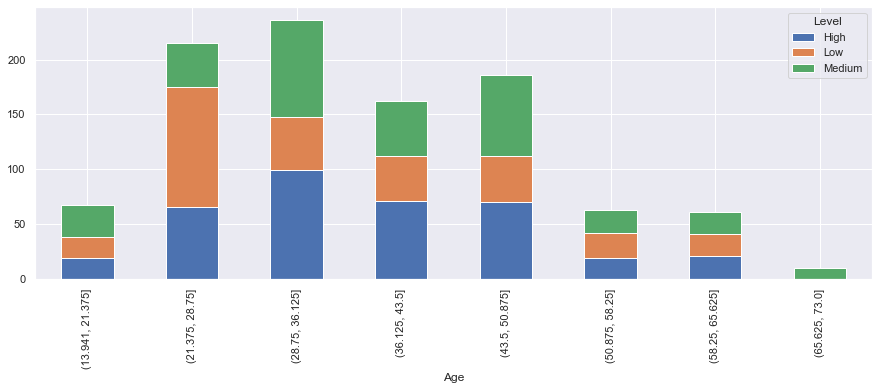

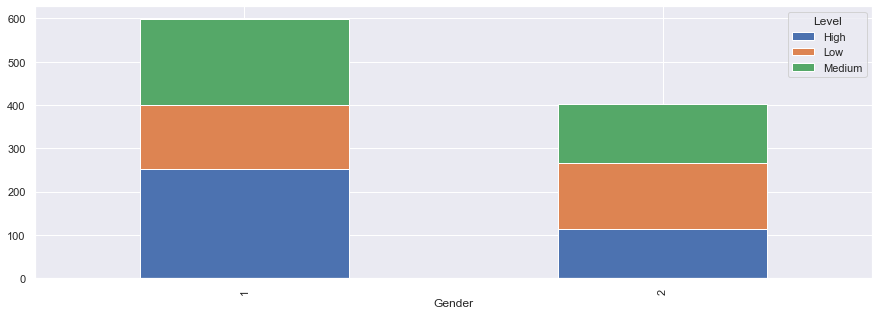

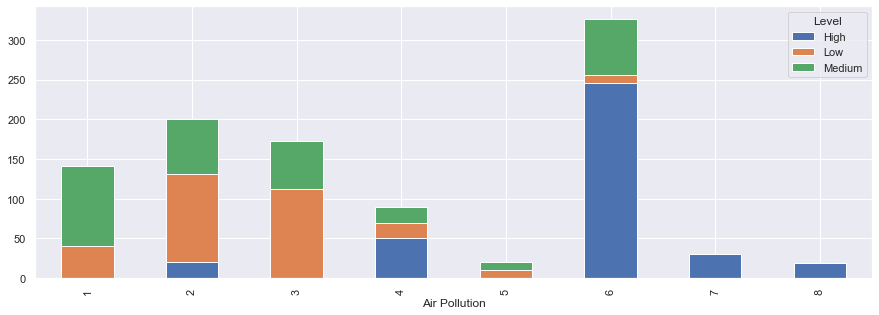

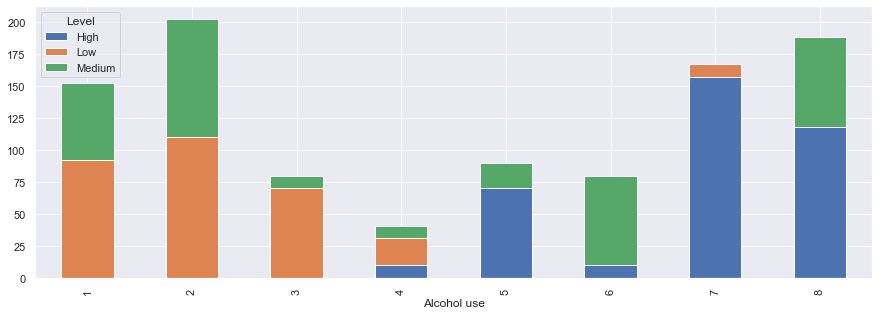

In [26]:
binned_df = df[['Age','Gender','Air Pollution','Alcohol use','Level']]
binned_df['Age'] = pd.cut(binned_df['Age'], 8)
df_age = binned_df.groupby('Age')['Level'].value_counts().unstack()
display(df_age.plot(kind='bar', stacked=True))
df_gender = binned_df.groupby('Gender')['Level'].value_counts().unstack()
display(df_gender.plot(kind='bar',stacked=True))
df_air_pollution = binned_df.groupby('Air Pollution')['Level'].value_counts().unstack()
display(df_air_pollution.plot(kind='bar',stacked=True))
df_alcohol_use = binned_df.groupby('Alcohol use')['Level'].value_counts().unstack()
display(df_alcohol_use.plot(kind='bar',stacked=True))

In [27]:
def detect_outliers(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
    return outliers

outliers_detected = detect_outliers(df)

outliers_df = pd.DataFrame(outliers_detected.sum(), columns=['Num Outliers'])
outliers_df.sort_values(by='Num Outliers', ascending=False, inplace=True)

print("Outliers detected:")
print(outliers_df)

Outliers detected:
                          Num Outliers
Age                                 10
Air Pollution                        0
chronic Lung Disease                 0
Wheezing                             0
Weight Loss                          0
Swallowing Difficulty                0
Snoring                              0
Smoking                              0
Shortness of Breath                  0
Patient Id                           0
Passive Smoker                       0
OccuPational Hazards                 0
Obesity                              0
Level                                0
Genetic Risk                         0
Gender                               0
Frequent Cold                        0
Fatigue                              0
Dust Allergy                         0
Dry Cough                            0
Coughing of Blood                    0
Clubbing of Finger Nails             0
Chest Pain                           0
Balanced Diet                        0
Alcoho

/var/folders/xg/35724bn104n2d9htc81mhvh00000gn/T/ipykernel_31739/3772812460.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))
